In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [46]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass (1).csv


In [71]:
df = pd.read_csv("glass.csv")

In [72]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [73]:
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [74]:
df.shape

(214, 10)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


<Axes: >

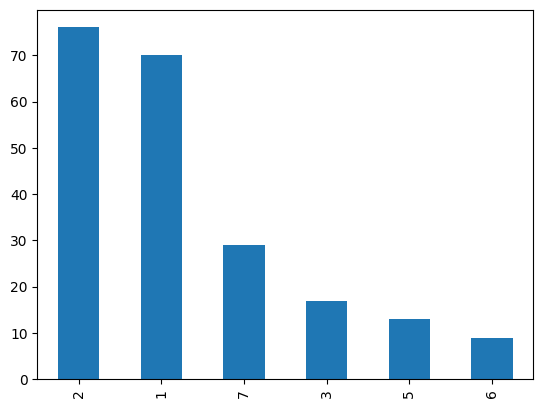

In [76]:
df['Type'].value_counts().plot.bar()

In [77]:
x = df.drop("Type",axis=1)

In [78]:
y = df["Type"]

In [79]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [80]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [81]:
scaler = StandardScaler()

In [82]:
x = scaler.fit_transform(x)

In [83]:
x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [95]:
col = df.columns

In [100]:
col = col[:-1]

In [101]:
col

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [102]:
x = pd.DataFrame(x,columns=col)

In [103]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [106]:
import warnings
warnings.filterwarnings("ignore")

In [107]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cross-Validated Accuracy')

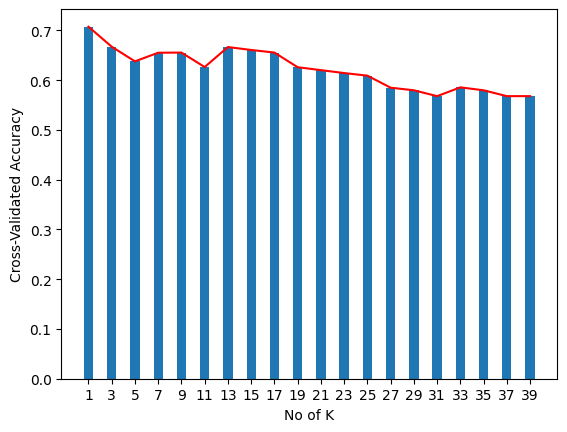

In [108]:
k_range = [2*i+1 for i in range(0,20)]
k_score = []

for i in k_range:
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn,x_train,y_train,cv=10)
  k_score.append(score.mean())

plt.bar(k_range,k_score)
plt.plot(k_range,k_score,color="r")
plt.xticks(k_range)
plt.xlabel("No of K")
plt.ylabel("Cross-Validated Accuracy")

Create KNN Model

In [114]:
knn = KNeighborsClassifier(n_neighbors=13)

In [115]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [116]:
y_predict = knn.predict(x_test)

In [121]:
print("Accuracy of the model =",accuracy_score(y_predict,y_test))

Accuracy of the model = 0.5813953488372093


In [118]:
cm = confusion_matrix(y_predict,y_test)

In [119]:
cm

array([[11,  7,  1,  0,  2,  0],
       [ 2,  7,  2,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  5]])

Text(50.722222222222214, 0.5, 'True Class')

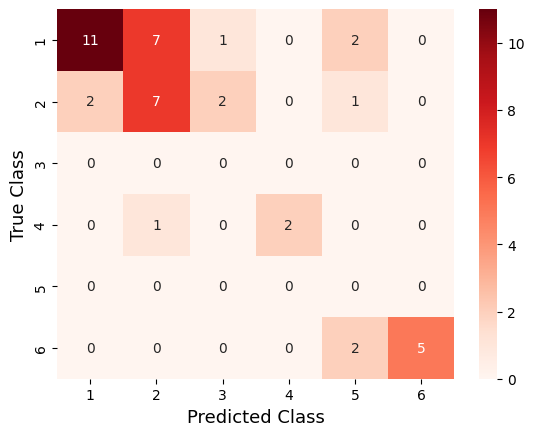

In [125]:
sns.heatmap(cm,annot=True,cmap="Reds",xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6])
plt.xlabel("Predicted Class",size=13)
plt.ylabel("True Class",size=13)